In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.fftpack import fft, fftfreq, ifft


import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import scipy
from scipy import signal

In [ ]:
datates = pd.read_csv("https://raw.githubusercontent.com/mochbale/Iot/main/DataRecord.csv")

datates.head(5)

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.017456,-0.042986,0.678524,0.215403,0.713191
1,0.025452,-0.177684,0.770341,-0.061551,0.792960
2,0.033478,-0.111145,0.683127,-0.622329,0.930758
3,0.041473,-0.157652,0.456567,-0.950757,1.066417
4,0.049438,-0.343019,0.444215,-1.100736,1.235560


In [ ]:
df = datates.to_numpy()
t, Ax,Ay,Az,amag = df.T
print(t[1])

0.025451561


Plot nilai untuk x acceleration

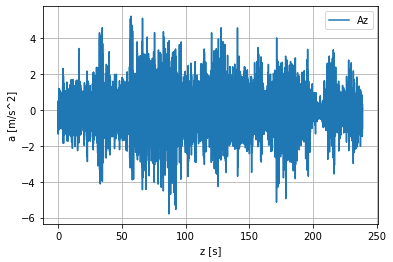

In [ ]:
plt.xlabel("z [s]")
plt.ylabel("a [m/s^2]")
plt.plot(t, Az, label="Az")


plt.grid()
plt. legend ()
plt.show()

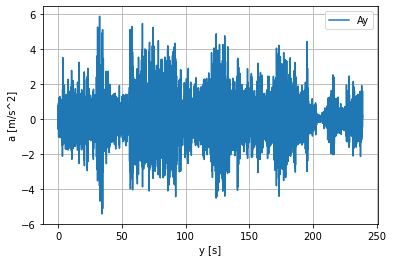

In [ ]:
plt.xlabel("y [s]")
plt.ylabel("a [m/s^2]")
plt.plot(t, Ay, label="Ay")


plt.grid()
plt. legend ()
plt.show()

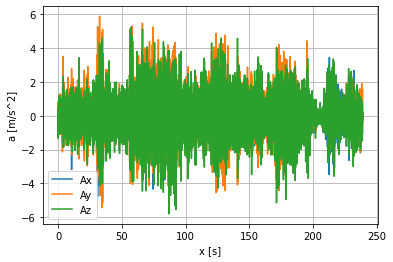

In [ ]:
plt.xlabel("x [s]")
plt.ylabel("a [m/s^2]")
plt.plot(t, Ax, label="Ax")
plt.plot(t,Ay, label="Ay")
plt.plot(t,Az, label="Az")


plt.grid()
plt. legend ()
plt.show()

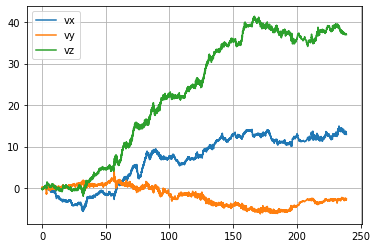

In [ ]:
df = t[5]-t[0]
vAx = [0]
vAy = [0]
vAz = [0]
for i in np.arange( len(t)-1):
    vAx = vAx + [vAx[-1] + Ax[i]*df]
    vAy = vAy + [vAy[-1] + Ay[i]*df]
    vAz = vAz + [vAz[-1] + Az[i]*df]
plt.plot(t,vAx, label="vx")
plt.plot(t, vAy, label = "vy")
plt.plot(t,vAz, label ="vz")
plt.legend()
plt.grid()
plt.show()

Dari data diatas padatnya kendaraan dari banyaknya kendaraan yang lewat pada waktu itu, diperkirakan waktu perekaman sekitar 50~70 km/h, dan mayoritas mobil besar dan sedang, motor yang lewat hanya beberapa. 

# *Tes*

100Hz 

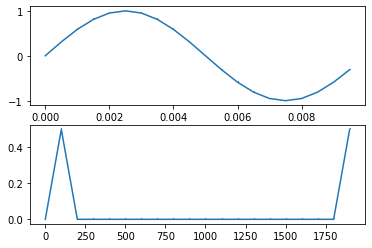

In [ ]:
# Construct a time signal
Fs = 2000 # Sampling freg
tstep = 1/ Fs # sample time interval
f0 = 100 # signal freq
N = int(Fs / f0) # number of samples
t = np.linspace (0, (N-1)*tstep, N) # time steps
fstep = Fs /N # freg interval
f = np.linspace(0, (N-1)*fstep, N) # freq steps
y = 1 * np.sin(2 * np.pi * f0 * t)
# perform fft
X = np.fft.fft(y)
X_mag = np. abs (X) / N
# plot
fig, [Ax1, Ax2] = plt.subplots(nrows=2, ncols=1)
Ax1.plot(t, y, ',-')
Ax2.plot(f, X_mag, ',-')
plt.show()